In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 232 from PyObject


In [2]:
X, y = load_breast_cancer().data, load_breast_cancer().target.reshape(-1,1)

In [3]:
X.shape,y.shape

((569, 30), (569, 1))

In [42]:
class sigmoid_bgd(object):
    
    def __init__(self, eta = 0.005, iterations = 1000, epsilon = 0.001):
        self.eta = eta
        self.iterations = iterations
        self.epsilon = epsilon
        
    def fit(self,X,y):
        w_ = np.random.rand(X.shape[1],1) * self.epsilon # 30x1
        b_ = np.zeros((1,1)) # 1x1
        m_ =len(y)
        cost_ = []
        acc_ = []
        i = 1
        while(i != self.iterations):
            Z1  = np.dot(X,w_) + b_ #  569x30 30x1 => 569x1
            A1 = self.sigmoid(Z1) # 569x1
            acc = self.acc(y,np.where(A1>0.5,1,0),m_)
            acc_.append(acc)
            #cost
            cost = -(1/m_) * np.sum(y*np.log(A1)+(1-y)*np.log(1-A1))
            cost_.append(cost)
            #derivatives
            dZ = A1-y # 569x1
            dW = (1/m_) * np.dot(X.T,dZ) # 30x 569 x 569x = 30x1
            dB = (1/m_) * np.sum(dZ, axis=0, keepdims= True) #1x1
            #print(dB.shape)
            #update
            w_ -= self.eta *dW
            b_ -= self.eta * dB
            if i % 100 ==0:
                print(f'epoch:{i}_acc:{acc}_cost:{cost}')
            i += 1
        history = pd.DataFrame(cost_ , columns = ['cost'])
        history['acc'] = acc_
        plt.figure(figsize =(14,4))
        plt.suptitle(f'Cost function monitoring {self.eta} {self.iterations} {self.epsilon}')
        plt.subplot(1,2,1)
        plt.title('acc')
        plt.ylim(0,1)
        plt.plot(history.acc)
        plt.subplot(1,2,2)
        plt.title('cost')
        plt.plot(history.cost)
        plt.show()
        return w_,b_
    
    def acc(self,y_true,y_pred,m_):
        return np.sum(y_true == y_pred)/m_
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))

<ipython-input-42-c3d35f19a39f>:52: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))
<ipython-input-42-c3d35f19a39f>:21: RuntimeWarning: divide by zero encountered in log
  cost = -(1/m_) * np.sum(y*np.log(A1)+(1-y)*np.log(1-A1))
<ipython-input-42-c3d35f19a39f>:21: RuntimeWarning: invalid value encountered in multiply
  cost = -(1/m_) * np.sum(y*np.log(A1)+(1-y)*np.log(1-A1))


epoch:100_acc:0.7065026362038664_cost:nan
epoch:200_acc:0.9068541300527241_cost:nan
epoch:300_acc:0.8980667838312829_cost:nan
epoch:400_acc:0.9156414762741653_cost:nan
epoch:500_acc:0.9156414762741653_cost:nan
epoch:600_acc:0.9173989455184535_cost:nan
epoch:700_acc:0.9191564147627417_cost:nan
epoch:800_acc:0.7592267135325131_cost:nan
epoch:900_acc:0.9156414762741653_cost:nan
epoch:1000_acc:0.9156414762741653_cost:nan
epoch:1100_acc:0.9209138840070299_cost:nan
epoch:1200_acc:0.9226713532513181_cost:nan
epoch:1300_acc:0.9086115992970123_cost:nan
epoch:1400_acc:0.9209138840070299_cost:nan
epoch:1500_acc:0.9156414762741653_cost:nan
epoch:1600_acc:0.9209138840070299_cost:nan
epoch:1700_acc:0.9191564147627417_cost:nan
epoch:1800_acc:0.9244288224956063_cost:nan
epoch:1900_acc:0.9209138840070299_cost:nan


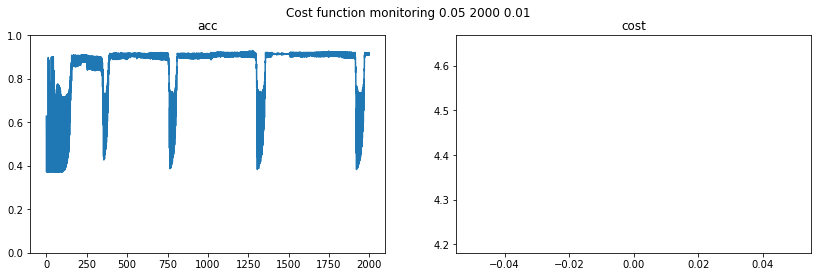

epoch:100_acc:0.7135325131810193_cost:nan
epoch:200_acc:0.9068541300527241_cost:nan
epoch:300_acc:0.9033391915641477_cost:nan
epoch:400_acc:0.9156414762741653_cost:nan
epoch:500_acc:0.9173989455184535_cost:nan
epoch:600_acc:0.9156414762741653_cost:nan
epoch:700_acc:0.9191564147627417_cost:nan
epoch:800_acc:0.7398945518453427_cost:nan
epoch:900_acc:0.9156414762741653_cost:nan
epoch:1000_acc:0.9156414762741653_cost:nan
epoch:1100_acc:0.9209138840070299_cost:nan
epoch:1200_acc:0.9191564147627417_cost:nan
epoch:1300_acc:0.9261862917398945_cost:nan
epoch:1400_acc:0.9209138840070299_cost:nan
epoch:1500_acc:0.9156414762741653_cost:nan
epoch:1600_acc:0.9209138840070299_cost:nan
epoch:1700_acc:0.9226713532513181_cost:nan
epoch:1800_acc:0.9226713532513181_cost:nan
epoch:1900_acc:0.9209138840070299_cost:nan


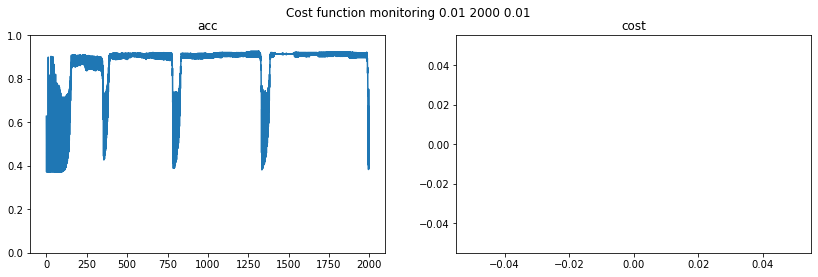

epoch:100_acc:0.37609841827768015_cost:nan
epoch:200_acc:0.8646748681898067_cost:nan
epoch:300_acc:0.8383128295254832_cost:nan
epoch:400_acc:0.8945518453427065_cost:nan
epoch:500_acc:0.8927943760984183_cost:nan
epoch:600_acc:0.8963093145869947_cost:nan
epoch:700_acc:0.8945518453427065_cost:nan
epoch:800_acc:0.4165202108963093_cost:nan
epoch:900_acc:0.8927943760984183_cost:nan
epoch:1000_acc:0.8945518453427065_cost:nan
epoch:1100_acc:0.9103690685413005_cost:nan
epoch:1200_acc:0.9121265377855887_cost:nan
epoch:1300_acc:0.8998242530755711_cost:nan
epoch:1400_acc:0.8998242530755711_cost:nan
epoch:1500_acc:0.9138840070298769_cost:nan
epoch:1600_acc:0.9015817223198594_cost:nan
epoch:1700_acc:0.9086115992970123_cost:nan
epoch:1800_acc:0.9050966608084359_cost:nan
epoch:1900_acc:0.8980667838312829_cost:nan


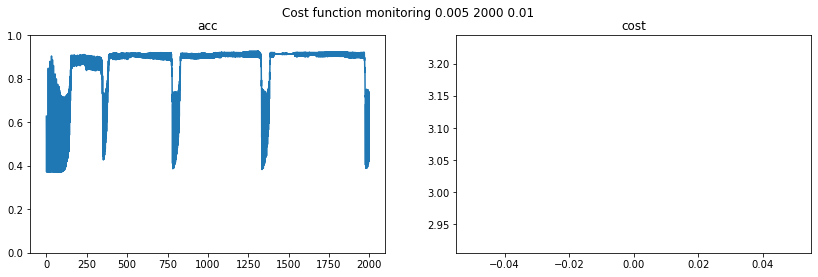

epoch:100_acc:0.7135325131810193_cost:nan
epoch:200_acc:0.9086115992970123_cost:nan
epoch:300_acc:0.9033391915641477_cost:nan
epoch:400_acc:0.9156414762741653_cost:nan
epoch:500_acc:0.9173989455184535_cost:nan
epoch:600_acc:0.9156414762741653_cost:nan
epoch:700_acc:0.9191564147627417_cost:nan
epoch:800_acc:0.9156414762741653_cost:nan
epoch:900_acc:0.9173989455184535_cost:nan
epoch:1000_acc:0.9191564147627417_cost:nan
epoch:1100_acc:0.9209138840070299_cost:nan
epoch:1200_acc:0.9191564147627417_cost:nan
epoch:1300_acc:0.7293497363796133_cost:nan
epoch:1400_acc:0.9156414762741653_cost:nan
epoch:1500_acc:0.9173989455184535_cost:nan
epoch:1600_acc:0.9068541300527241_cost:nan
epoch:1700_acc:0.9050966608084359_cost:nan
epoch:1800_acc:0.8980667838312829_cost:nan
epoch:1900_acc:0.4903339191564148_cost:nan


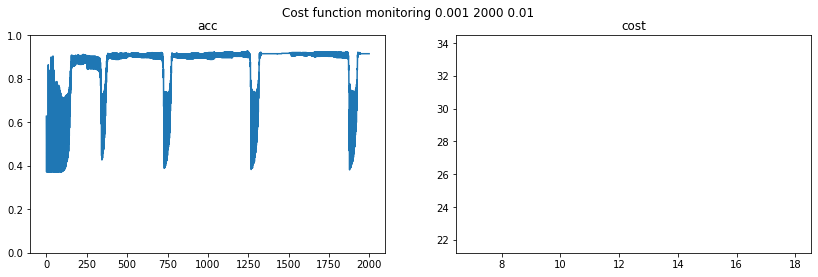

epoch:100_acc:0.37258347978910367_cost:nan
epoch:200_acc:0.8699472759226714_cost:nan
epoch:300_acc:0.8471001757469244_cost:nan
epoch:400_acc:0.8945518453427065_cost:nan
epoch:500_acc:0.9015817223198594_cost:nan
epoch:600_acc:0.8998242530755711_cost:nan
epoch:700_acc:0.8840070298769771_cost:nan
epoch:800_acc:0.8963093145869947_cost:nan
epoch:900_acc:0.8927943760984183_cost:nan
epoch:1000_acc:0.8945518453427065_cost:nan
epoch:1100_acc:0.9015817223198594_cost:nan
epoch:1200_acc:0.9015817223198594_cost:nan
epoch:1300_acc:0.9086115992970123_cost:nan
epoch:1400_acc:0.9173989455184535_cost:nan
epoch:1500_acc:0.9173989455184535_cost:nan
epoch:1600_acc:0.9050966608084359_cost:nan
epoch:1700_acc:0.9033391915641477_cost:nan
epoch:1800_acc:0.8980667838312829_cost:nan
epoch:1900_acc:0.9156414762741653_cost:nan


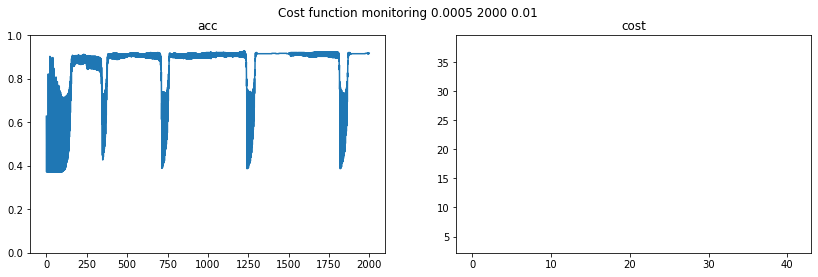

epoch:100_acc:0.37609841827768015_cost:8.635942372177263
epoch:200_acc:0.8910369068541301_cost:0.5729870479246796
epoch:300_acc:0.5922671353251318_cost:2.543563407796156
epoch:400_acc:0.9121265377855887_cost:0.44233662339536584
epoch:500_acc:0.9033391915641477_cost:0.41150386892701923
epoch:600_acc:0.45342706502636204_cost:5.057408665327312
epoch:700_acc:0.9015817223198594_cost:0.4143896251725367
epoch:800_acc:0.8963093145869947_cost:0.39872339810298113
epoch:900_acc:0.8840070298769771_cost:0.42065289007083434
epoch:1000_acc:0.8980667838312829_cost:0.4219564016571041
epoch:1100_acc:0.9191564147627417_cost:0.3642107413337813
epoch:1200_acc:0.9191564147627417_cost:0.3441156797036307
epoch:1300_acc:0.9173989455184535_cost:0.32670280762751214
epoch:1400_acc:0.9138840070298769_cost:0.3115058462293922
epoch:1500_acc:0.9138840070298769_cost:0.2982593510296887
epoch:1600_acc:0.8963093145869947_cost:0.3147252887785822
epoch:1700_acc:0.9173989455184535_cost:0.3649898998765015
epoch:1800_acc:0.91

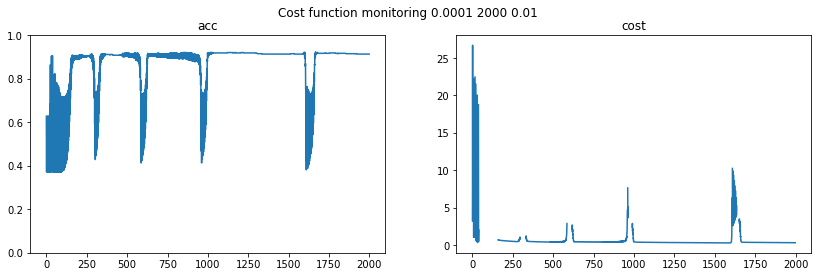

epoch:100_acc:0.7205623901581723_cost:inf
epoch:200_acc:0.9103690685413005_cost:0.3237049343805151
epoch:300_acc:0.9156414762741653_cost:0.2683298904567278
epoch:400_acc:0.9191564147627417_cost:0.26997184526042406
epoch:500_acc:0.9138840070298769_cost:0.24759052194632433
epoch:600_acc:0.9156414762741653_cost:0.23254327914697728
epoch:700_acc:0.8910369068541301_cost:0.4233175035027144
epoch:800_acc:0.9173989455184535_cost:0.2380793086152662
epoch:900_acc:0.9226713532513181_cost:0.22871130028371492
epoch:1000_acc:0.9209138840070299_cost:0.2220886521533908
epoch:1100_acc:0.9209138840070299_cost:0.2172817574647562
epoch:1200_acc:0.9173989455184535_cost:0.2137157624512902
epoch:1300_acc:0.9191564147627417_cost:0.2346077424032521
epoch:1400_acc:0.9209138840070299_cost:0.22485672347581476
epoch:1500_acc:0.9209138840070299_cost:0.21992113609720482
epoch:1600_acc:0.9191564147627417_cost:0.21606458053248268
epoch:1700_acc:0.9191564147627417_cost:0.21299492162401984
epoch:1800_acc:0.9191564147627

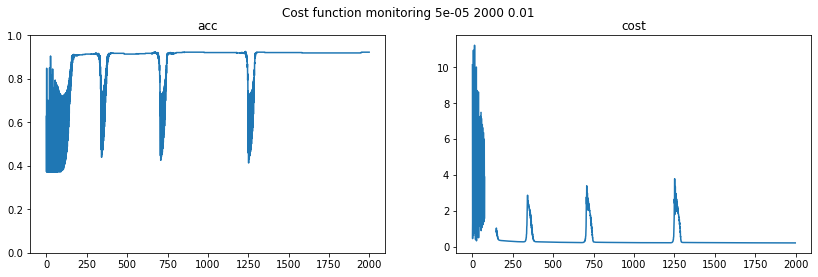

epoch:100_acc:0.9068541300527241_cost:0.46607846574584977
epoch:200_acc:0.9050966608084359_cost:0.41854229272135346
epoch:300_acc:0.9050966608084359_cost:0.3874173855825257
epoch:400_acc:0.9050966608084359_cost:0.36471961360699723
epoch:500_acc:0.9050966608084359_cost:0.3470894434803538
epoch:600_acc:0.9033391915641477_cost:0.3328265470592061
epoch:700_acc:0.9068541300527241_cost:0.3209622050290547
epoch:800_acc:0.9086115992970123_cost:0.3108978970412745
epoch:900_acc:0.9086115992970123_cost:0.3022419973803647
epoch:1000_acc:0.9103690685413005_cost:0.29472614011710724
epoch:1100_acc:0.9103690685413005_cost:0.28815710982049714
epoch:1200_acc:0.9121265377855887_cost:0.2823871616101794
epoch:1300_acc:0.9138840070298769_cost:0.27729634467131214
epoch:1400_acc:0.9156414762741653_cost:0.27278342232941905
epoch:1500_acc:0.9156414762741653_cost:0.2687620057436024
epoch:1600_acc:0.9156414762741653_cost:0.2651588522146247
epoch:1700_acc:0.9156414762741653_cost:0.2619125484773709
epoch:1800_acc:0

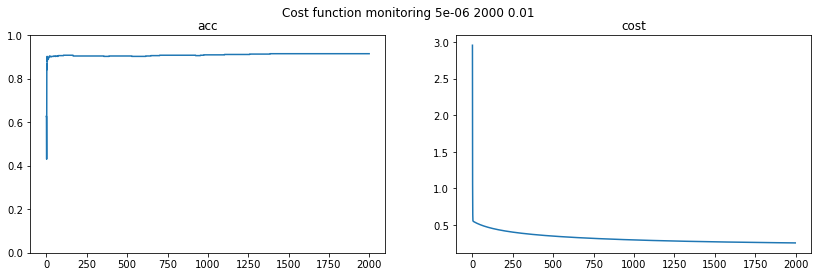

In [46]:
learning_rates = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.000005]
for learning_rate in learning_rates:
    w_,b_ = sigmoid_bgd(eta = learning_rate, iterations= 2000, epsilon=0.01).fit(X,y)

In [70]:
class nn_sigmod_1hidden(object):
    def __init__(self, eta = 0.05, iterations = 2000, epsilon = 0.01, hidden = 60):
        self.eta = eta
        self.iterations = iterations
        self.epsilon = epsilon
        self.hidden = hidden
        
    def fit(self,X,y):
        w2_ = np.random.rand(1, self.hidden)  * self.epsilon # 1x60
        b2_ = np.zeros((1,1))                   # 1x1
        w1_ = np.random.rand(self.hidden,X.shape[1]) * self.epsilon #60x30
        b1_ = np.zeros((self.hidden,1))                   # 5x1
        X_ = X.T    # 30x 569
        y_ = y.T    # 1x 569
        m_ = len(y)
        cost_ = []
        acc_ = []
        i = 1
        while(i != self.iterations):
            #forward-prop
            Z1 = np.dot(w1_,X_) + b1_ # 60x30 30x 569 => 60x569 
            A1 = self.sigmoid(Z1) # 60x569 
            Z2 = np.dot(w2_,A1) + b2_ #1x60 60x569 => 1x569
            A2 = self.sigmoid(Z2)
            #cost & acc
            acc = self.acc(y_,np.where(A2>0.5,1,0),m_)
            acc_.append(acc)
            cost = -(1/m_) * np.sum(y_ * np.log(A2) + (1-y_)*np.log(1-A2))
            cost_.append(cost)
            ## derivatives
            dZ2 = A2 -y_  # 1x 569
            dW2 = (1/m_) * np.dot(dZ2,A1.T) # 1x569 569x60 = 1x60
            dB2 = (1/m_) * np.sum(dZ2, axis =1, keepdims= True) #1x1
            #print(f'dB2 shape: {dB2.shape}')
            #print(f'w2 shape: {w2_.shape}')
            #print(f'dZ2 shape: {dZ2.shape}')
            dZ1 = np.dot(w2_.T,dZ2)* (A1 * (1-A1)) ##  60x1  1x569  =>  60x569 60x569
            dW1 = (1/m_) * np.dot(dZ1,X_.T) # 60x569 569x30 => 60x30
            dB1 =  (1/m_) * np.sum(dZ1, axis =1 , keepdims=True)
            # back-prop
            w2_ -= self.eta * dW2
            b2_ -= self.eta * dB2
            w1_ -= self.eta * dW1
            b1_ -= self.eta * dB1                  
            if i % 100 ==0:
                print(f'epochs:{i}_acc:{acc}_cost:{cost}')
            i += 1        
        history =pd.DataFrame(cost_, columns= ['cost'])
        history['acc'] = acc_
        plt.figure(figsize =(14,4))
        plt.suptitle(f'Cost function monitoring {self.eta} {self.iterations} {self.epsilon}')
        plt.subplot(1,2,1)
        plt.title('acc')
        plt.ylim(0,1)
        plt.plot(history.acc)
        plt.subplot(1,2,2)
        plt.title('cost')
        plt.plot(history.cost)
        plt.show()      
        return w2_,b2_,w1_,b1_
    
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    
    def acc(self,y_true,y_pred,m_):
        return np.sum(y_true == y_pred)/m_
    

epochs:100_acc:0.6274165202108963_cost:0.660373814356974
epochs:200_acc:0.6274165202108963_cost:0.6603491818014636
epochs:300_acc:0.6274165202108963_cost:0.6603394158589485
epochs:400_acc:0.6274165202108963_cost:0.6603322942071376
epochs:500_acc:0.6274165202108963_cost:0.6603313355669521
epochs:600_acc:0.6274165202108963_cost:0.6603289232719077
epochs:700_acc:0.6274165202108963_cost:0.6603269776774431
epochs:800_acc:0.6274165202108963_cost:0.6603248597583249
epochs:900_acc:0.6274165202108963_cost:0.6603230057547838
epochs:1000_acc:0.6274165202108963_cost:0.6603281769155451
epochs:1100_acc:0.6274165202108963_cost:0.6603243710489554
epochs:1200_acc:0.6274165202108963_cost:0.6603232435153359
epochs:1300_acc:0.6274165202108963_cost:0.6603221984140226
epochs:1400_acc:0.6274165202108963_cost:0.6603183750228002
epochs:1500_acc:0.6274165202108963_cost:0.66032337876591
epochs:1600_acc:0.6274165202108963_cost:0.6603222333887444
epochs:1700_acc:0.6274165202108963_cost:0.6603215623677796
epochs:18

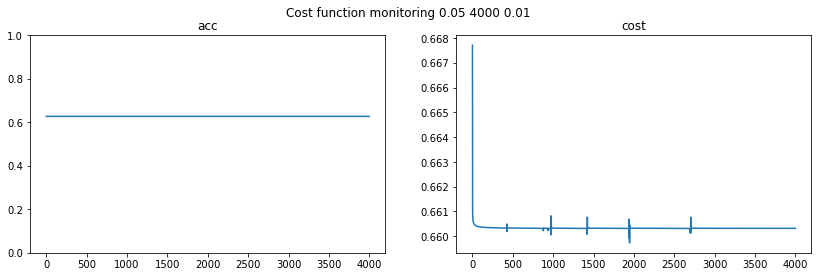

epochs:100_acc:0.6274165202108963_cost:0.6603655658226114
epochs:200_acc:0.6274165202108963_cost:0.6573448370392635
epochs:300_acc:0.6274165202108963_cost:0.6452135901259479
epochs:400_acc:0.6274165202108963_cost:0.6000831512997158
epochs:500_acc:0.6274165202108963_cost:0.6221752049687237
epochs:600_acc:0.6274165202108963_cost:0.5690135901787379
epochs:700_acc:0.9103690685413005_cost:0.4963219515432069
epochs:800_acc:0.7926186291739895_cost:0.5671578414757253
epochs:900_acc:0.9138840070298769_cost:0.43992587987604653
epochs:1000_acc:0.9086115992970123_cost:0.4086133215074459
epochs:1100_acc:0.9121265377855887_cost:0.3817027368118111
epochs:1200_acc:0.8927943760984183_cost:0.3825071874202111
epochs:1300_acc:0.9050966608084359_cost:0.3578994966851633
epochs:1400_acc:0.9050966608084359_cost:0.36793862486407947
epochs:1500_acc:0.9086115992970123_cost:0.33878266935924833
epochs:1600_acc:0.9050966608084359_cost:0.32293878670800513
epochs:1700_acc:0.8769771528998243_cost:0.32890530176702903
e

<ipython-input-70-2114d35cac1d>:63: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-z))


epochs:2300_acc:0.9173989455184535_cost:0.3054320615909959
epochs:2400_acc:0.9191564147627417_cost:0.2691356281655633
epochs:2500_acc:0.9121265377855887_cost:0.26759178491381574
epochs:2600_acc:0.9103690685413005_cost:0.2612204982773574
epochs:2700_acc:0.9156414762741653_cost:0.259521878757924
epochs:2800_acc:0.9173989455184535_cost:0.25218213808914103
epochs:2900_acc:0.9173989455184535_cost:0.2538267665721923
epochs:3000_acc:0.9121265377855887_cost:0.24737482430240254
epochs:3100_acc:0.9156414762741653_cost:0.26388272676672003
epochs:3200_acc:0.9033391915641477_cost:0.25299397179598554
epochs:3300_acc:0.9209138840070299_cost:0.24212866119111354
epochs:3400_acc:0.9209138840070299_cost:0.2487922528359134
epochs:3500_acc:0.9086115992970123_cost:0.2681348844294977
epochs:3600_acc:0.9173989455184535_cost:0.2341423283986008
epochs:3700_acc:0.9103690685413005_cost:0.265057125958872
epochs:3800_acc:0.9068541300527241_cost:0.2615785976876552
epochs:3900_acc:0.9015817223198594_cost:0.2434628612

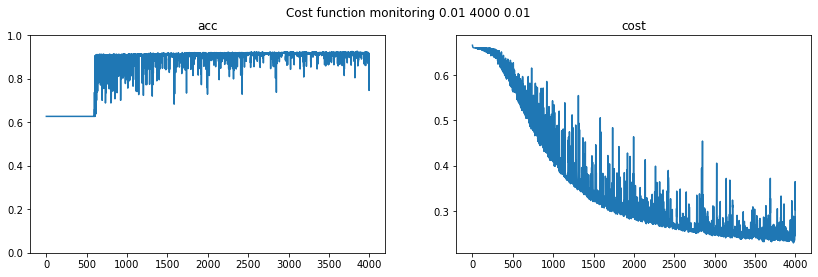

epochs:100_acc:0.6274165202108963_cost:0.6605955171917383
epochs:200_acc:0.6274165202108963_cost:0.6604973705227267
epochs:300_acc:0.6274165202108963_cost:0.6604541763311742
epochs:400_acc:0.6274165202108963_cost:0.6604287442082716
epochs:500_acc:0.6274165202108963_cost:0.6604115172401108
epochs:600_acc:0.6274165202108963_cost:0.6603986861901266
epochs:700_acc:0.6274165202108963_cost:0.6603881166227611
epochs:800_acc:0.6274165202108963_cost:0.6603769187487667
epochs:900_acc:0.6274165202108963_cost:0.6601329458037689
epochs:1000_acc:0.6274165202108963_cost:0.6586610027280545
epochs:1100_acc:0.6274165202108963_cost:0.6559346181885204
epochs:1200_acc:0.6274165202108963_cost:0.6418278887525567
epochs:1300_acc:0.6274165202108963_cost:0.6355657832202745
epochs:1400_acc:0.6274165202108963_cost:0.6140471611422893
epochs:1500_acc:0.6274165202108963_cost:0.5977982821973485
epochs:1600_acc:0.6274165202108963_cost:0.5755834092288342
epochs:1700_acc:0.6274165202108963_cost:0.5554901438985399
epochs

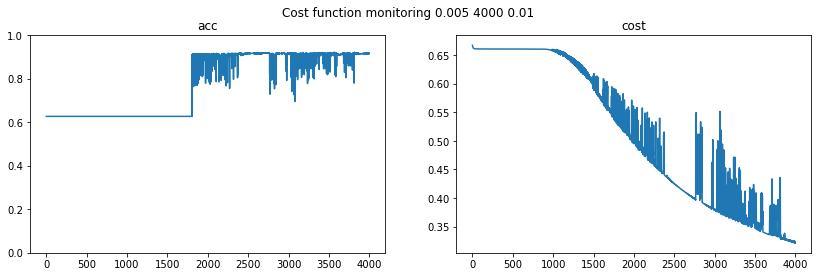

epochs:100_acc:0.6274165202108963_cost:0.6612525314263359
epochs:200_acc:0.6274165202108963_cost:0.6608355997504362
epochs:300_acc:0.6274165202108963_cost:0.6607225003626455
epochs:400_acc:0.6274165202108963_cost:0.6606598723782204
epochs:500_acc:0.6274165202108963_cost:0.6606169610882734
epochs:600_acc:0.6274165202108963_cost:0.660585072910377
epochs:700_acc:0.6274165202108963_cost:0.6605602061439438
epochs:800_acc:0.6274165202108963_cost:0.6605401467369053
epochs:900_acc:0.6274165202108963_cost:0.6605235487767184
epochs:1000_acc:0.6274165202108963_cost:0.6605095397734535
epochs:1100_acc:0.6274165202108963_cost:0.6604975258893871
epochs:1200_acc:0.6274165202108963_cost:0.6604870870496875
epochs:1300_acc:0.6274165202108963_cost:0.6604779166314654
epochs:1400_acc:0.6274165202108963_cost:0.6604697849230677
epochs:1500_acc:0.6274165202108963_cost:0.6604625160126044
epochs:1600_acc:0.6274165202108963_cost:0.6604559726340816
epochs:1700_acc:0.6274165202108963_cost:0.6604500459219523
epochs:

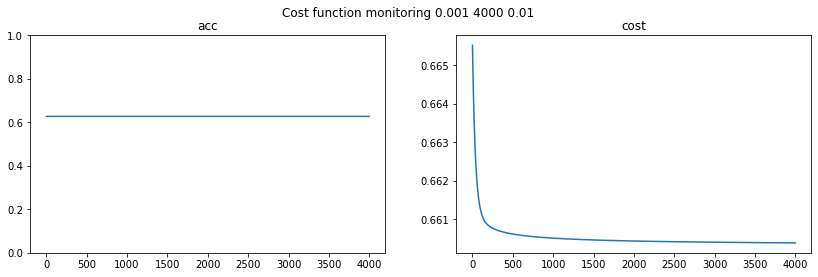

epochs:100_acc:0.6274165202108963_cost:0.6628065350472416
epochs:200_acc:0.6274165202108963_cost:0.6613657919821039
epochs:300_acc:0.6274165202108963_cost:0.6609441495631376
epochs:400_acc:0.6274165202108963_cost:0.6607921686129398
epochs:500_acc:0.6274165202108963_cost:0.6607196426897892
epochs:600_acc:0.6274165202108963_cost:0.6606750396520037
epochs:700_acc:0.6274165202108963_cost:0.6606428540971311
epochs:800_acc:0.6274165202108963_cost:0.6606175743191995
epochs:900_acc:0.6274165202108963_cost:0.6605967778670155
epochs:1000_acc:0.6274165202108963_cost:0.6605791645221049
epochs:1100_acc:0.6274165202108963_cost:0.6605639271581578
epochs:1200_acc:0.6274165202108963_cost:0.6605505147929053
epochs:1300_acc:0.6274165202108963_cost:0.6605385249531632
epochs:1400_acc:0.6274165202108963_cost:0.6605276450566093
epochs:1500_acc:0.6274165202108963_cost:0.6605176140787874
epochs:1600_acc:0.6274165202108963_cost:0.6605081907352567
epochs:1700_acc:0.6274165202108963_cost:0.6604991166241705
epochs

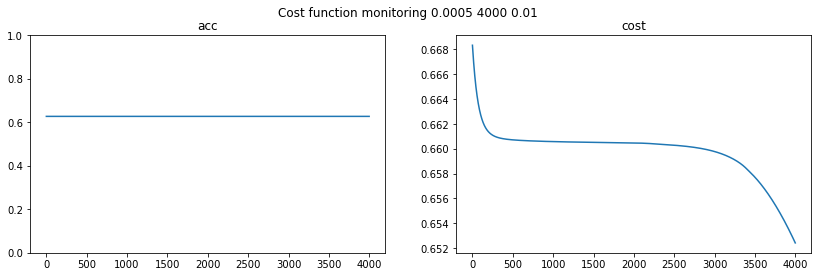

epochs:100_acc:0.6274165202108963_cost:0.6669275982559
epochs:200_acc:0.6274165202108963_cost:0.665486552150094
epochs:300_acc:0.6274165202108963_cost:0.6644013247796787
epochs:400_acc:0.6274165202108963_cost:0.6635805326844803
epochs:500_acc:0.6274165202108963_cost:0.6629572672419826
epochs:600_acc:0.6274165202108963_cost:0.6624821016588645
epochs:700_acc:0.6274165202108963_cost:0.6621183063818783
epochs:800_acc:0.6274165202108963_cost:0.6618384781858749
epochs:900_acc:0.6274165202108963_cost:0.6616221119007151
epochs:1000_acc:0.6274165202108963_cost:0.6614538276457295
epochs:1100_acc:0.6274165202108963_cost:0.6613220660430369
epochs:1200_acc:0.6274165202108963_cost:0.6612181227672478
epochs:1300_acc:0.6274165202108963_cost:0.6611354315047079
epochs:1400_acc:0.6274165202108963_cost:0.661069029893144
epochs:1500_acc:0.6274165202108963_cost:0.6610151608356493
epochs:1600_acc:0.6274165202108963_cost:0.6609709742980137
epochs:1700_acc:0.6274165202108963_cost:0.6609343038864002
epochs:1800

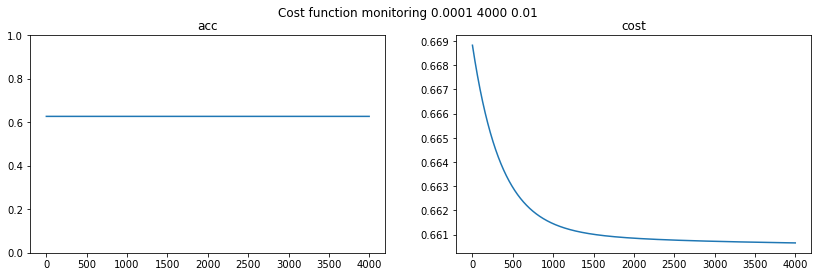

epochs:100_acc:0.6274165202108963_cost:0.6676552188575096
epochs:200_acc:0.6274165202108963_cost:0.6667666181052042
epochs:300_acc:0.6274165202108963_cost:0.6660003832276843
epochs:400_acc:0.6274165202108963_cost:0.6653379266230742
epochs:500_acc:0.6274165202108963_cost:0.6647640766010766
epochs:600_acc:0.6274165202108963_cost:0.6642662271590324
epochs:700_acc:0.6274165202108963_cost:0.6638337691924311
epochs:800_acc:0.6274165202108963_cost:0.6634576981635334
epochs:900_acc:0.6274165202108963_cost:0.6631303281560165
epochs:1000_acc:0.6274165202108963_cost:0.662845073410357
epochs:1100_acc:0.6274165202108963_cost:0.6625962754609364
epochs:1200_acc:0.6274165202108963_cost:0.662379062902366
epochs:1300_acc:0.6274165202108963_cost:0.6621892356182739
epochs:1400_acc:0.6274165202108963_cost:0.6620231680267911
epochs:1500_acc:0.6274165202108963_cost:0.6618777275181629
epochs:1600_acc:0.6274165202108963_cost:0.6617502052756853
epochs:1700_acc:0.6274165202108963_cost:0.6616382573393922
epochs:1

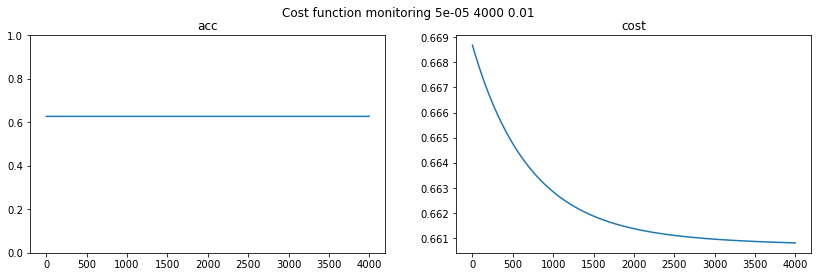

epochs:100_acc:0.6274165202108963_cost:0.6693968477572179
epochs:200_acc:0.6274165202108963_cost:0.6692816047255127
epochs:300_acc:0.6274165202108963_cost:0.6691679701502068
epochs:400_acc:0.6274165202108963_cost:0.669055920949605
epochs:500_acc:0.6274165202108963_cost:0.6689454343734939
epochs:600_acc:0.6274165202108963_cost:0.6688364879992224
epochs:700_acc:0.6274165202108963_cost:0.668729059727745
epochs:800_acc:0.6274165202108963_cost:0.6686231277796356
epochs:900_acc:0.6274165202108963_cost:0.6685186706910797
epochs:1000_acc:0.6274165202108963_cost:0.6684156673098501
epochs:1100_acc:0.6274165202108963_cost:0.6683140967912722
epochs:1200_acc:0.6274165202108963_cost:0.6682139385941864
epochs:1300_acc:0.6274165202108963_cost:0.6681151724769103
epochs:1400_acc:0.6274165202108963_cost:0.6680177784932075
epochs:1500_acc:0.6274165202108963_cost:0.6679217369882656
epochs:1600_acc:0.6274165202108963_cost:0.6678270285946902
epochs:1700_acc:0.6274165202108963_cost:0.6677336342285147
epochs:1

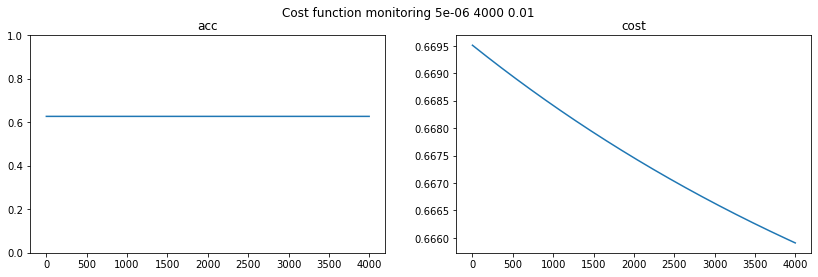

In [72]:
learning_rates = [0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005, 0.000005]
for learning_rate in learning_rates:
    w2_,b2_,w1_,b1_ = nn_sigmod_1hidden(eta = learning_rate, iterations= 4000, epsilon=0.01).fit(X,y)